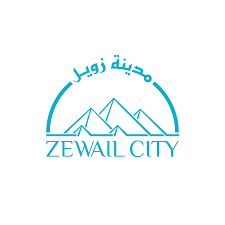
<h1 align="center">Zewail University of Science and Technology
</h1>

<h1 align="center">Biomedical Sciences_ Computational Biology and Genomics_
BMS 474
</h1>
<h1 align="center">FALL 2023	</h1>
<h1 align="center">Assignment 2</h1>


#Task 1

<h1 align="center">"There are a wealth of exciting dimensions that could be visited throughout PCA in the Multiverse of Madness"
</font></h1>

<h1 align="center"><font color="red">Doctor Strange 🖐🏼🌀🧛🏻‍♂️</font></h1>


##Principal Component Analysis (PCA) Manual Calculation and Comparison
You are tasked with implementing the Principal Component Analysis (PCA) algorithm on the given 2 features and mapping it to only one feature using three different approaches. Follow the steps below:


**1. Manual PCA Calculation:**

Perform the PCA algorithm manually without using any coding. Show your calculations step by step on paper or in a document.


**2. PCA Using Numpy Functions:**

Implement PCA using numpy functions. Utilize functions like np.mean and np.cov to simplify the process. Provide well-documented code with comments explaining each step. Compare the results obtained from this approach with your manual calculations.


**3.PCA Using Pre-built Function:**

Use a pre-built PCA function from a library (e.g., scikit-learn) to perform PCA on the same data. Provide well-documented code with comments explaining each step. Compare the results obtained from this approach with both your manual calculations and the numpy-based implementation. Calculate and discuss the loss resulting from the feature selection technique.


**4. Loss Comparison and Explanation:**

Calculate the loss for  Pre-built approach.

**Data:**

    Sample 1   Sample 2   Sample 3   Sample 4
    Feature 1    4         -2         -4          2
    Feature 2    4         -2         -4          2



**Submission:**

Submit your manual calculations as a document or a series of clear, organized steps on paper. For the numpy-based and pre-built PCA implementations, provide well-documented code and discuss any differences or similarities in the results. Identify and discuss any loss resulting from the feature selection technique.

**Solution Answers**

**2. PCA Using Numpy Functions:**

In [ ]:
import numpy as np
!pip install --upgrade scikit-learn


# Defining data as a 2-D numpy array
data = np.array([[4, -2, -4, 2],
                 [4, -2, -4, 2]])

# Calculate the mean of each feature across all samples
data_mean = np.mean(data, axis=1) # axis 1 means along the rows. data_mean is now 1D

# Center the data by subtracting the mean. This is important to be done before being passed to the covariance matrix.

#print(data.shape, data_mean.reshape(-1, 1).shape)
#print(data, '\n', data_mean.reshape(-1, 1))

centered_data = data - data_mean.reshape(2, 1) # This line subtracts the mean of the samples from all the corresponding sample points
# To explain this, let us first consider subtracting them without using reshape. I will get an error that says we cannot do an operation where the data has a shape of (2, 4) and data_mean has a shape of (2,) bec. it's 1 dimensional
# To solve this, I need to force data_mean to have a shape of (2, 1) where every row has the corresponding mean for the 4 samples
# I can also use reshape(-1, 1) --> the -1 is a clever method used by numpy to suggest one dimension based on the other, but in this case we know that it must be (2, 1)

print('Centered data: \n', centered_data) #It's the exact same dataset because the means were 0, so when we subtract them nothing happens :D

# Calculate the covariance matrix
cov_matrix = np.cov(centered_data) # I use np.cov to calculate the covariance matrix
print('Covariance matrix: \n', cov_matrix) # All numbers are similar again because the two samples had exactly similar features

# Calculate the eigenvalues and eigenvectors for the covariance matrix using linalg.eg function
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by descending value of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1] # this is used to sort the indices based on the values. We make it ::-1 because the default is that it sorts in ascending order, so we need to flip it
eigenvectors = eigenvectors[:, sorted_indices] # now I see the sorted eigenvectors for the corresponding sorted eigenvalues
print('Sorted eigenvectors: \n', eigenvectors) # Now they are sorted

selected_eigenvectors = eigenvectors[:, 0] # this means select all rows for the first column only (which in this case is the most varied column). If we want to reduce to more than one dimension, we can make it eigenvectors[:, :k] where k is the desired dimensionality
# I notice that the eigenvectors are columns not rows, so we do a transpose first to have them as rows to avoid any sign issues

selected_eigenvectors = selected_eigenvectors.T

# Project the centered data onto the selected eigenvector(s) to obtain the reduced dimensional representation, in this case 1 dimension only
pca_result = np.dot(selected_eigenvectors, centered_data)

# Display the result
print("PCA new features using Numpy functions:")
print(pca_result)

# It is indeed similar to the manual calculations!

Centered data: 
 [[ 4. -2. -4.  2.]
 [ 4. -2. -4.  2.]]
Covariance matrix: 
 [[13.33333333 13.33333333]
 [13.33333333 13.33333333]]
Sorted eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
PCA new features using Numpy functions:
[ 5.65685425 -2.82842712 -5.65685425  2.82842712]


**Step 3: PCA Using Pre-built Function**

In [ ]:
from sklearn.decomposition import PCA

# Defining data as a 2-D numpy array
data = np.array([[4, -2, -4, 2],
                 [4, -2, -4, 2]])

# Define a PCA object with the desired number of components (dimensions or number of features)
pca = PCA(n_components=1)

# Fit the PCA model and transform the data (which needs to be transposed because the pca scikit function only accepts the data in the shape (samples, features) but it was (features, samples))
pca_result = pca.fit_transform(data.T)

# Display the result
print("PCA Result using Pre-built Function:")
print(pca_result)

# It is indeed similar to both the manual calculations and numpy-based approach
# However, it results in a 2D array though (with shape of (4, 1)) with the same numbers. I am not sure why. It should produce it (4,) not (4, 1)

PCA Result using Pre-built Function:
[[ 5.65685425]
 [-2.82842712]
 [-5.65685425]
 [ 2.82842712]]


**Step 4: Loss Comparison and Explanation:**

In [ ]:
from sklearn.decomposition import PCA

# Defining data as a 2-D numpy array
data = np.array([[4, -2, -4, 2],
                 [4, -2, -4, 2]])

# Create a PCA object with the desired number of components
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data.T)

pov = pca.explained_variance_ratio_  # The output of this is 1, which means all the data is explained by PC1, and that makes sense because it was identical to the other component

print('Principal of variance:', pov)

# Calculate the loss
loss = 1 - pov

print("Loss from PCA Using Pre-built Function:", loss) # The loss is 0, and this makes perfect sense because the two feactures are identical and lie on the same line (perfectly correlated)

Principal of variance: [1.]
Loss from PCA Using Pre-built Function: [0.]


#Task 2

##Task: Dataset Analysis and Feature Selection
The "Khan" dataset comprises 2308 rows and 88 columns, representing gene expression values. In this task, we aim to preprocess the dataset appropriately, apply Fisher discriminant ratio filtering, perform Principal Component Analysis (PCA), save the results, and visualize the 2D and 3D dominant components.

**Tasks:**

- **Dataset Preprocessing:**

   Suggest an appropriate preprocessing technique for the utilized data set. Justify your answer and apply your suggest method

- **Fisher Discriminant Ratio Filtering:**
  Implement the Fisher discriminant ratio filtering technique.Identify and report the top 10 features with the highest Fisher discriminant ratio.

- **Principal Component Analysis (PCA)**:

  Apply PCA to derive the 10 dominant components.
  Perform PCA and report the results, including the 10 dominant components.


- **Visualization and Discussion:**

  1. Visualize the top two features identified by the FDR approach using different colors for each class. Discuss the observed patterns.

  2. Visualize the dominant components in both 2D and 3D, assigning distinct colors for each class. Discuss the patterns observed. Afterward, compare this visualization with the one conducted previously.








The top 10 genes by PCA list includes:  ['catenin (cadherin-associated protein), alpha 1 (102kD)', 'farnesyl-diphosphate farnesyltransferase 1', 'phosphofructokinase, platelet', 'cytochrome c-1', 'uroporphyrinogen III synthase (congenital erythropoietic porphyria)', 'ribosomal protein L26', 'guanine nucleotide binding protein (G protein), alpha stimulating activity polypeptide 1', 'pre-mRNA splicing factor SF3a (120 kDa subunit), similar to S. cerevisiae PRP21', 'adenylyl cyclase-associated protein', 'ubiquinol-cytochrome c reductase core protein II']
The top 10 genes by FDR list includes:  ['Wiskott-Aldrich syndrome (ecezema-thrombocytopenia)', 'Fc fragment of IgG, receptor, transporter, alpha', 'transmembrane protein', 'major histocompatibility complex, class II, DM alpha', 'proteasome (prosome, macropain) subunit, beta type, 8 (large multifunctional protease 7)', 'fibroblast growth factor receptor 4', 'pim-2 oncogene', 'Homo sapiens inducible protein mRNA, complete cds', 'antigen id

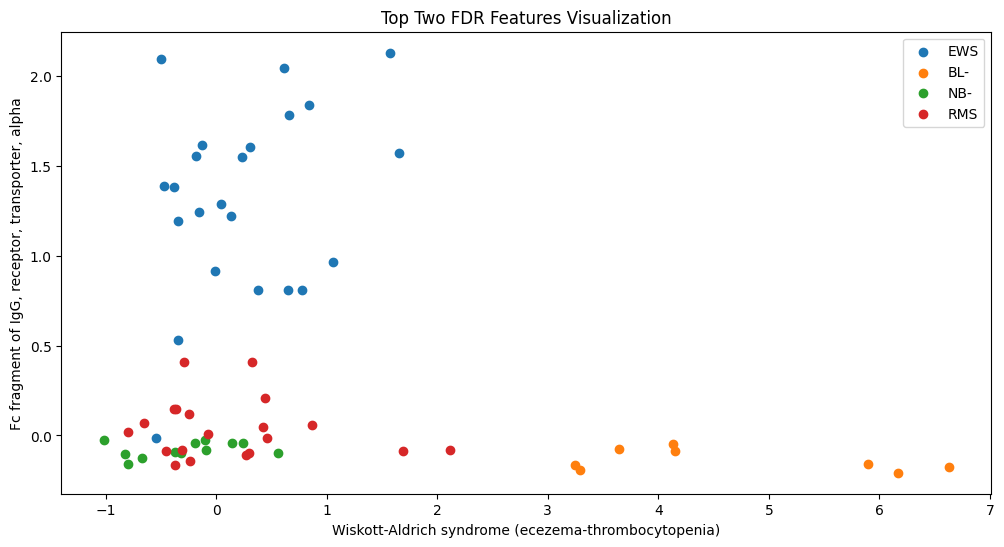

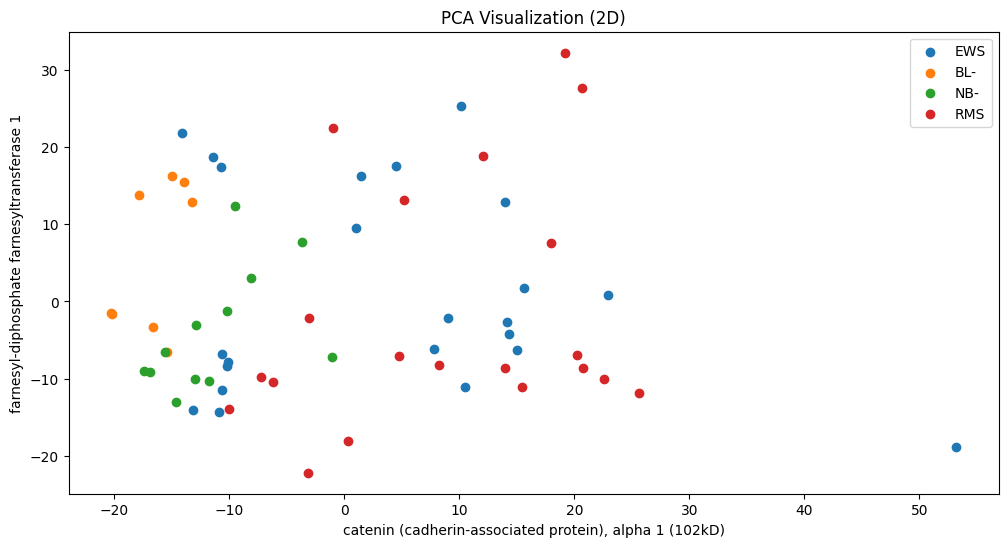

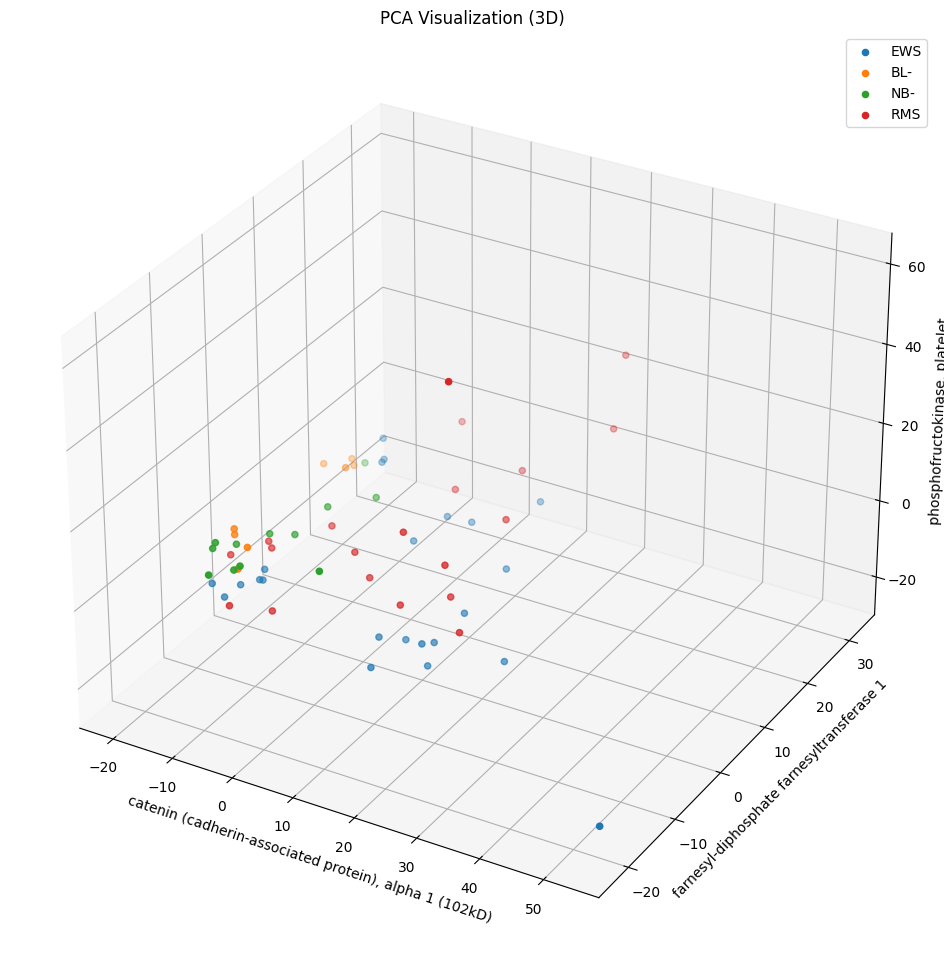

In [375]:
# First, we need to load and preprocess the data
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif


df = pd.read_csv('Assignment2_Data.txt', sep='\t') # I read the file with the correct separator as the tab
# df.head()
# df.info()

# the data is very messy and needs to be cleaned. We should use the samples as rows (EWS, TEST, and so on)
# We should also use the genes as columns and remove any unneccesary rows/columns
# We need to normalize the data and remove any outliers or missing values

df.columns = df.iloc[0] # first, we change the column names with the values in the first row
df = df[1:] # then we drop the first row (because we already retained the information as the column names)
df.index = df.iloc[:, 1].values # we change the index (row names) to be the gene names
df = df.iloc[:,2:] # we remove the first two columns which contain the gene description and image id. I don't need them
df = df.T # now we transpose so that our samples are rows and genes are columns
# Now the data contains 88 samples and 2308 genes!

# I proceed with removing nulls, outliers, and finally normalization!!

# df.columns.isna().sum() # There are 78 columns that are called NaN. I should remove those.

df = df.loc[:, df.columns.notna()] # Removal of columns with NaN
# df.columns.isna().sum() # Now there are 0 columns with NaN, so it means I removed them successfully

# Now, I want to keep all unique genes as they are and delete any duplicate genes

# Drop the original columns for repeated genes
df = df.loc[:, ~df.columns.duplicated()]

# df.isna().sum().sum() # there are 0 null values in the dataframe itself so I don't need to remove any nulls
df = df.astype(float) # Making sure that all gene expression values are floats (numbers)

# Then, I normalize with the z-score method
# df_z_scores = df.apply(zscore)

# Get the indices where the value is either larger than 2 or lower than -2, which correspond for the outliers
# outlier_indices = ((df_z_scores > 2) | (df_z_scores < -2))
# outlier_indices.sum().sum() # 8869 outliers

# df[outlier_indices] = np.nan

# Here I am converting any outlier value to be = NaN and I will attempt to remove it below

# The problem is that both df.dropna(axis=0) and df.dropna(axis=1) remove ALL THE DATA. This is because EVERY gene from the 2230 is an outlier in at least one sample. So I cannot remove by column since I'll lose all genes
# Also, EVERY sample has at least one outlier gene, I cannot remove by rows since I'll lose all samples
# Therefore, I think that normalization is enough to bring all values somewhat near from each other, so I'll proceed with the normalized dataset

# I read online that the best method for normalization if we have outliers that we want to reduce their impact is the RobustScaler normalization method, which relies on the IQR
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

df['label'] = df.index.str[:3] # Adding a new column with the class labels, which I consider the firt 3 letters from every sample name
#df['label'].value_counts() # There are 25 TES, 23 EWS, 20 RMS, 12 NB-, and 8 BL-

# I will remove all the rows with labels = TES because these are testing samples and I should only work with training data

df = df[df['label'] != 'TES']

# I will now perform PCA to select the best 10 components (features)
features = df.drop('label', axis=1)
pca = PCA(n_components=10)
pca_result = pca.fit_transform(features)

# Create a new DataFrame with the top 10 principal components and their corresponding gene names
df_pca_top10 = pd.DataFrame(data=pca_result, columns=features.columns[:10], index=df.index)

df_pca_top10['label'] = df['label'] # I will retain the labels because I will need it for the visualization below

top_10_pca_genes = [gene for gene in features.columns[:10]]
print("The top 10 genes by PCA list includes: ", top_10_pca_genes) # These are the top 10 genes.

# __________________________________________________________________________________________________

# Doing the FDR manually will take A LOT OF TIME
# Therefore, I asked you on WhatsApp if I could use a built-in function and you told me yes, you can. That is why I used the f_classif function below

# Separate features and labels
X = df.drop(['label'], axis=1) # the dataframe without labels
y = LabelEncoder().fit_transform(df['label']) # A categorical encodes that transforms label names to [0, 1, 2, 3]

# Perform Fisher Discriminant Ratio filtering
f_scores, _ = f_classif(X, y) # FDR scores

# Create a DataFrame with feature names and their corresponding FDR scores
fdr_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores})

# Sort the DataFrame by FDR scores in descending order
fdr_df = fdr_df.sort_values(by='Fisher_Score', ascending=False)

# Select the top 10 features
top_10_features = fdr_df.head(10)

top_10_fdr_genes = [gene for gene in top_10_features['Feature']]
print("The top 10 genes by FDR list includes: ", top_10_fdr_genes) # These are the top 10 genes.

top_2_features = fdr_df.head(2)

# Create a scatter plot for the top two features
plt.figure(figsize=(12, 6))

for label in df['label'].unique():
    plt.scatter(df[df['label'] == label][top_2_features['Feature'].iloc[0]], # the distribution of gene expression of a particular label for the top FDR gene
                df[df['label'] == label][top_2_features['Feature'].iloc[1]], # the distribution of gene expression of a particular label for the second-to-top FDR gene
                label=label) # the legend
# This for loop draws the FDR values between the top FDR and second-to-top FDR for every label of the 4
# So, we have 8 combinations

plt.title('Top Two FDR Features Visualization')
plt.xlabel(top_2_features['Feature'].iloc[0]) # the x-axis has the best-FDR gene name
plt.ylabel(top_2_features['Feature'].iloc[1]) # the y-axis has the second-to-best FDR gene name
plt.legend() # the legend is the label
plt.show()

# My observation is that for EWS class, the second-to-top FDR gene (the Fc fragment) has high values while the top FDR gene (Wiskott) has low expression values
# For NB- and RMS, both of the genes have low expression values
# For the BL- class, Wiskott has higher expression values while Fc fragment gene has low expression values
# That means that these genes may be suitable to discriminate between EWS and BL-, but not really for the other two classes


# Visualize dominant PCA components in 2D

# By the same token as the code above, do it for the PCA (top 2 features or dimensions)

plt.figure(figsize=(12, 6))
for label in df_pca_top10['label'].unique():
    plt.scatter(df_pca_top10[df_pca_top10['label'] == label][df_pca_top10.columns[0]],
                df_pca_top10[df_pca_top10['label'] == label][df_pca_top10.columns[1]],
                label=label)

plt.title('PCA Visualization (2D)')
plt.xlabel(df_pca_top10.columns[0])
plt.ylabel(df_pca_top10.columns[1])
plt.legend()
plt.show()

# My observation is that the top 2 genes (which are Catenin and Farnesyl) cannot distinguish between EWS and RMS because the data is completely sparsed
# However, for the BL- class, it seems that Catenin is low while Farnesyl is moderate-to-high.
# For the NB class, it also seems to have the same behavior as the BL- class, though the Catenin have slightly higher values

# Visualize dominant components in 3D

# Again, it's the same code but instead of adding the scatter to the plt object, I add it to the ax object which now contains a 3D projection
# The 111 in the arguments below refers to subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot" and so on

fig = plt.figure(figsize=(12, 12)) # I made it (12, 12) instead of (12, 8) to see the third column name because it wasn't clear
ax = fig.add_subplot(111, projection='3d')
for label in df_pca_top10['label'].unique():
    ax.scatter(df_pca_top10[df_pca_top10['label'] == label][df_pca_top10.columns[0]],
               df_pca_top10[df_pca_top10['label'] == label][df_pca_top10.columns[1]],
               df_pca_top10[df_pca_top10['label'] == label][df_pca_top10.columns[2]],
               label=label)

ax.set_title('PCA Visualization (3D)')
ax.set_xlabel(df_pca_top10.columns[0])
ax.set_ylabel(df_pca_top10.columns[1])
ax.set_zlabel(df_pca_top10.columns[2])
ax.legend()
plt.show()

# My observation is that all classes except RMS lie on the floor of the space, in that case it means that phosphofructokinase expression values are very low for that class
# If the distribution of the data in that case is that most of the data points lie on the floor of the space, it means we can make a 2D reduction and that the third component does not add much.
